# Analysis of 'weatherAUS' Dataset using Logistic Regression and dealing with Multicollinearity using Variance Influence Factor(VIF)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("weatherAUS.csv",index_col='Date',parse_dates=True)
df


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


<h3> Preprocessing

In [20]:
df.isnull().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Drop Evaporation, Sunshine, Cloud9am, Cloud3pm since they have maximum number of missing values 

In [21]:
df.shape

(145460, 22)

<h3>Dropping features with highest NAN values

In [22]:
# Removing the columns with more than 50000 NAN values
df.drop(["Location","Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1,inplace=True)

In [23]:
# removing records with NAN values
df.dropna(inplace=True)

In [24]:
df.shape

(112925, 17)

In [25]:
# mapping to numeric
df['RainToday'] = df['RainToday'].map( {'No':0, 'Yes':1} ) 
df['RainTomorrow'] = df['RainTomorrow'].map( {'No':0, 'Yes': 1} )

In [27]:
data = df.iloc[:,:-1]
data

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
2008-12-02,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2008-12-03,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
2008-12-04,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
2008-12-05,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0
2017-06-21,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
2017-06-22,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0


<h3>Encoding the Categoric Features

In [28]:
# Applying the LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat_variable = ["WindGustDir","WindDir9am","WindDir3pm"]

for i in cat_variable:
    data[i] = le.fit_transform(data[i])
data


,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday
Date,,,,,,,,,,,,,,,,
2008-12-01,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0
2008-12-02,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0
2008-12-03,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0
2008-12-04,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0
2008-12-05,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,3.5,21.8,0.0,0,31.0,2,0,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0
2017-06-21,2.8,23.4,0.0,0,31.0,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0
2017-06-22,3.6,25.3,0.0,6,22.0,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0


<h3> Calculating the VIF factor

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

calculate_vif(data)


,variables,VIF
0,MinTemp,44.237827
1,MaxTemp,544.222859
2,Rainfall,1.477936
3,WindGustDir,6.579445
4,WindGustSpeed,25.209811
5,WindDir9am,4.698323
6,WindDir3pm,6.483569
7,WindSpeed9am,7.794471
8,WindSpeed3pm,12.629941
9,Humidity9am,57.295445


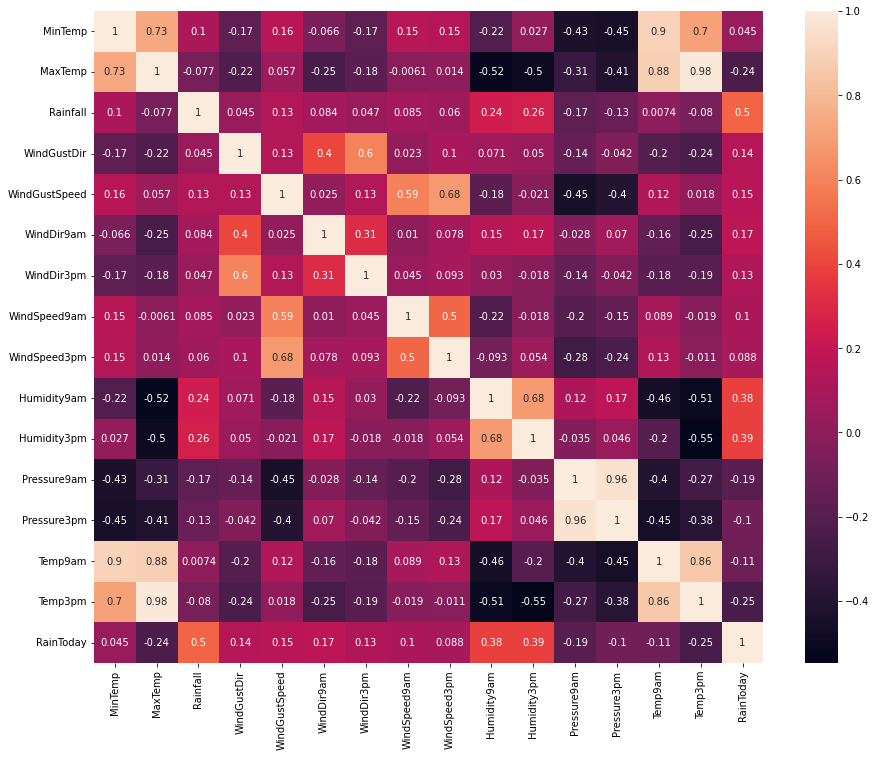

In [30]:
# Plotting the correlation matrix
plt.figure(figsize=(15,12))
corr = data.corr()
sns.heatmap(corr,annot=True)
plt.show()


(Pressure9am,Pressure3pm)  (Temp9am,MinTemp)  (MaxTemp,Temp3pm) are some of variable pairs with high Multicollinearity

<h3> Creating new features from existing feature pair with high multicollinearity

In [31]:
X= data
X["Pressure_diff"] = np.abs(X["Pressure9am"]-X["Pressure3pm"])
X["Temp_diff_9pm_min"] = np.abs(X["Temp9am"]-X["MinTemp"])
X["Temp_diff_3pm_max"] = np.abs(X["MaxTemp"]-X["Temp3pm"])
X["Humidity_diff"] = np.abs(X["Humidity9am"]-X["Humidity3pm"])
X["Wind_diff_gust_3pm"] = np.abs(X["WindGustSpeed"]-X["WindSpeed3pm"])
X.drop(["Pressure9am","Pressure3pm","Temp9am","Temp3pm","MinTemp","MaxTemp"],axis=1,inplace=True)
X.drop(["Humidity9am","Humidity3pm"],axis=1,inplace=True)
X.drop(["WindGustSpeed","WindSpeed3pm"],axis=1,inplace=True)


In [32]:
# Calculating VIF after processing
vif = calculate_vif(data)
vif

,variables,VIF
0,Rainfall,1.443935
1,WindGustDir,6.392000
2,WindDir9am,3.955989
3,WindDir3pm,6.247674
4,WindSpeed9am,4.632954
5,RainToday,1.888319
6,Pressure_diff,4.398880
7,Temp_diff_9pm_min,4.130218
8,Temp_diff_3pm_max,2.597267
9,Humidity_diff,3.079479


<h3>Removing the features with more than 5 VIF value

In [33]:
for i,j in zip(vif["variables"],vif["VIF"]):
    if j>5:
        data.drop(i,axis=1,inplace=True)
data
    

,Rainfall,WindDir9am,WindSpeed9am,RainToday,Pressure_diff,Temp_diff_9pm_min,Temp_diff_3pm_max,Humidity_diff
Date,,,,,,,,
2008-12-01,0.6,13,20.0,0,0.6,3.5,1.1,49.0
2008-12-02,0.0,6,4.0,0,2.8,9.8,0.8,19.0
2008-12-03,0.0,13,19.0,0,1.1,8.1,2.5,8.0
2008-12-04,0.0,9,11.0,0,4.8,8.9,1.5,29.0
2008-12-05,1.0,1,7.0,0,4.8,0.3,2.6,49.0
...,...,...,...,...,...,...,...,...
2017-06-20,0.0,2,15.0,0,3.5,5.9,0.9,32.0
2017-06-21,0.0,9,13.0,0,4.3,7.3,1.0,27.0
2017-06-22,0.0,9,13.0,0,4.4,7.3,0.8,35.0


In [34]:
data["RainToday"] = df["RainToday"]
x = data
y = df["RainTomorrow"]


<h3> Splitting the Dataset into train and test

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


<h3> Applying the Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
lr.score(x_test,y_test)


0.8103193813094043

<h3> Evaluation

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     26342
           1       0.66      0.30      0.42      7536

    accuracy                           0.81     33878
   macro avg       0.74      0.63      0.65     33878
weighted avg       0.79      0.81      0.78     33878

